In [87]:
import warnings
warnings.filterwarnings('ignore')

In [88]:
import pandas as pd
import numpy as np
import scipy as sp
import seaborn as sns
%matplotlib inline

In [89]:
from google.colab import drive
drive.mount('/content/drive',force_remount=True)

Mounted at /content/drive


In [90]:
#Give path where training data is kept
import os
os.chdir('/content/drive/My Drive/startup')

In [91]:
df_train = pd.read_csv('SeoulBikeData.csv', encoding= 'unicode_escape',parse_dates=['Date'])

In [92]:
df_train.head()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,2017-01-12,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,2017-01-12,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,2017-01-12,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,2017-01-12,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,2017-01-12,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


In [93]:
df_train['Year'] = pd.DatetimeIndex(df_train['Date']).year
df_train['Month'] = pd.DatetimeIndex(df_train['Date']).month

In [94]:
df_train.head()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day,Year,Month
0,2017-01-12,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,2017,1
1,2017-01-12,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,2017,1
2,2017-01-12,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes,2017,1
3,2017-01-12,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,2017,1
4,2017-01-12,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes,2017,1


In [95]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 16 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   Date                       8760 non-null   datetime64[ns]
 1   Rented Bike Count          8760 non-null   int64         
 2   Hour                       8760 non-null   int64         
 3   Temperature(°C)            8760 non-null   float64       
 4   Humidity(%)                8760 non-null   int64         
 5   Wind speed (m/s)           8760 non-null   float64       
 6   Visibility (10m)           8760 non-null   int64         
 7   Dew point temperature(°C)  8760 non-null   float64       
 8   Solar Radiation (MJ/m2)    8760 non-null   float64       
 9   Rainfall(mm)               8760 non-null   float64       
 10  Snowfall (cm)              8760 non-null   float64       
 11  Seasons                    8760 non-null   object        
 12  Holida

In [96]:
df_train.isnull().sum()

Date                         0
Rented Bike Count            0
Hour                         0
Temperature(°C)              0
Humidity(%)                  0
Wind speed (m/s)             0
Visibility (10m)             0
Dew point temperature(°C)    0
Solar Radiation (MJ/m2)      0
Rainfall(mm)                 0
Snowfall (cm)                0
Seasons                      0
Holiday                      0
Functioning Day              0
Year                         0
Month                        0
dtype: int64

In [97]:
# import labelencoder
from sklearn.preprocessing import LabelEncoder

# filter categorical columns using mask and turn it into a list
categorical_cols = df_train.select_dtypes(exclude = ['int64','float64','datetime64[ns]']).columns.tolist()

# instantiate labelencoder object
le = LabelEncoder()
# apply le on categorical feature columns
df_train[categorical_cols] = df_train[categorical_cols].apply(lambda col: le.fit_transform(col))
df_train.head()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day,Year,Month
0,2017-01-12,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,3,1,1,2017,1
1,2017-01-12,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,3,1,1,2017,1
2,2017-01-12,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,3,1,1,2017,1
3,2017-01-12,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,3,1,1,2017,1
4,2017-01-12,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,3,1,1,2017,1


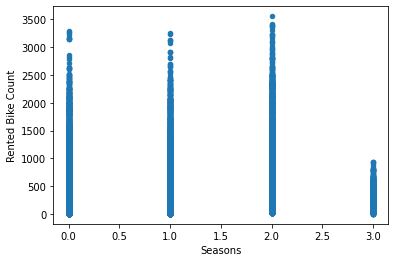

In [98]:
df_train.plot.scatter(x = 'Seasons', y = 'Rented Bike Count')

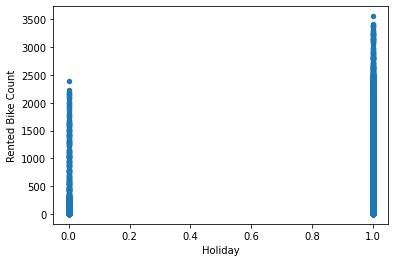

In [99]:
df_train.plot.scatter(x = 'Holiday', y = 'Rented Bike Count') 

In [100]:
df_train.nunique()

Date                          365
Rented Bike Count            2166
Hour                           24
Temperature(°C)               546
Humidity(%)                    90
Wind speed (m/s)               65
Visibility (10m)             1789
Dew point temperature(°C)     556
Solar Radiation (MJ/m2)       345
Rainfall(mm)                   61
Snowfall (cm)                  51
Seasons                         4
Holiday                         2
Functioning Day                 2
Year                            2
Month                          12
dtype: int64

In [101]:
UselessColumns = ['Date','Year']
df_train = df_train.drop(UselessColumns,axis=1)
df_train.head()

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day,Month
0,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,3,1,1,1
1,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,3,1,1,1
2,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,3,1,1,1
3,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,3,1,1,1
4,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,3,1,1,1


In [102]:

def PlotBarCharts(inpData, colsToPlot):
    %matplotlib inline
    
    import matplotlib.pyplot as plt
    
    # Generating multiple subplots
    fig, subPlot=plt.subplots(nrows=1, ncols=len(colsToPlot), figsize=(20,5))
    fig.suptitle('Bar charts of: '+ str(colsToPlot))

    for colName, plotNumber in zip(colsToPlot, range(len(colsToPlot))):
        inpData.groupby(colName).size().plot(kind='bar',ax=subPlot[plotNumber])

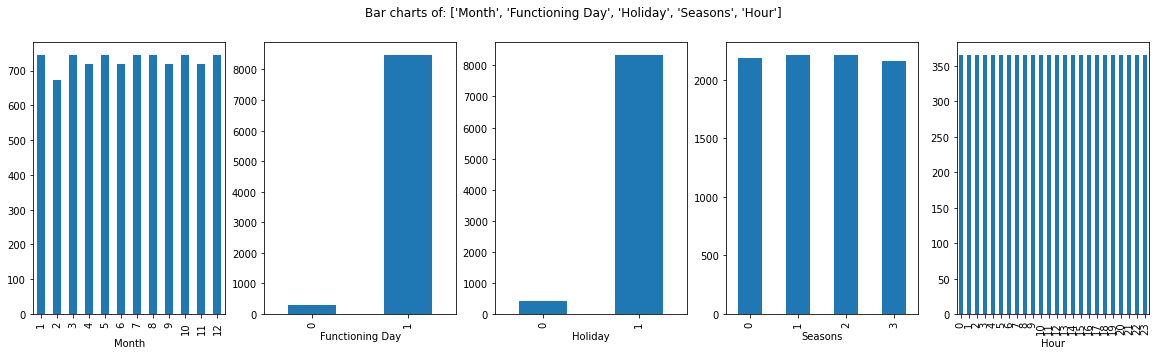

In [103]:
# Calling the function
PlotBarCharts(inpData=df_train, colsToPlot=['Month','Functioning Day','Holiday','Seasons','Hour'])    

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fae5c55de90>,
      dtype=object)

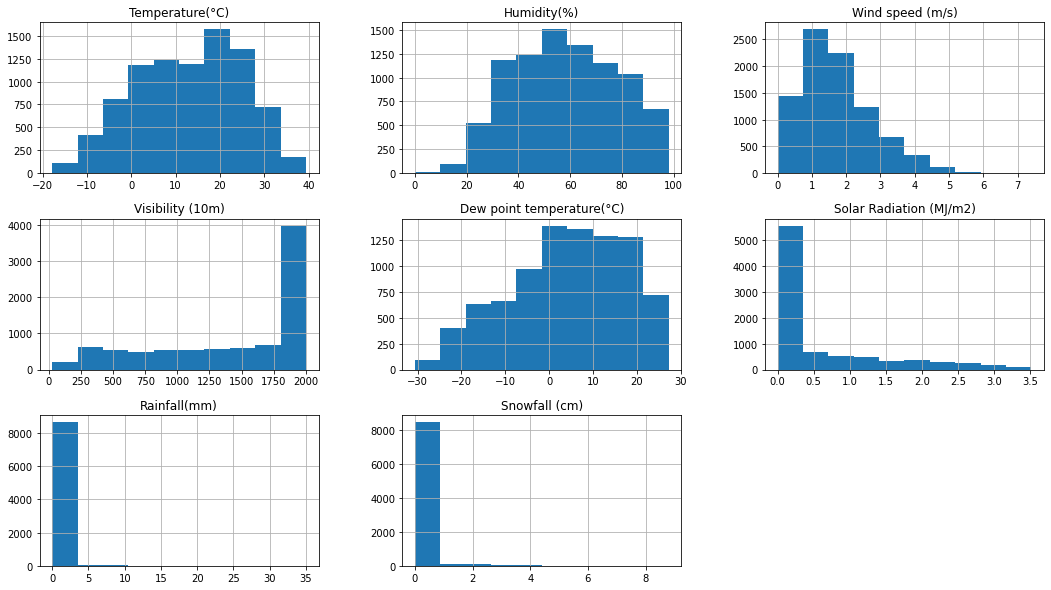

In [104]:
# Plotting histograms of multiple columns together
df_train.hist(['Temperature(°C)','Humidity(%)','Wind speed (m/s)','Visibility (10m)','Dew point temperature(°C)',
               'Solar Radiation (MJ/m2)','Rainfall(mm)','Snowfall (cm)'], figsize=(18,10))

In [105]:
#Relationship exploration: Continuous Vs Continuous -- Scatter Charts

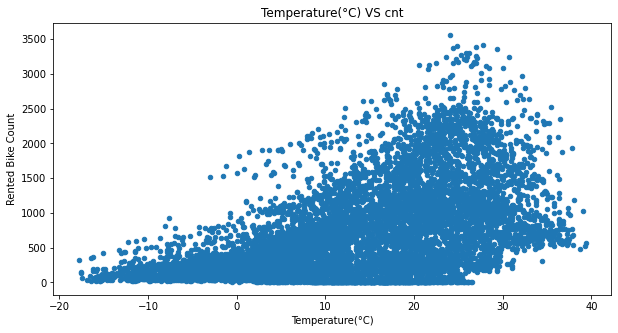

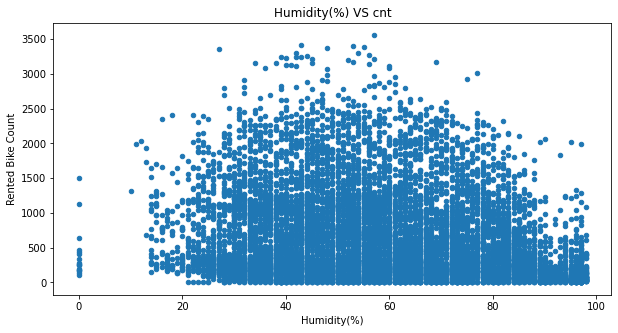

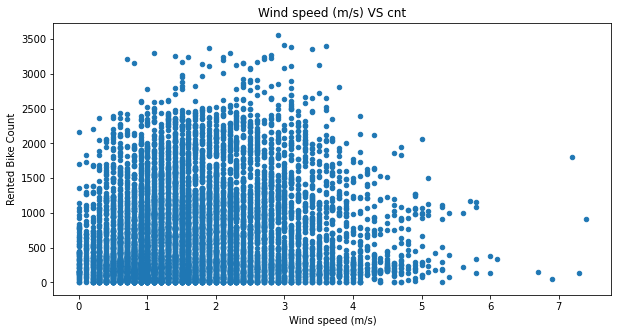

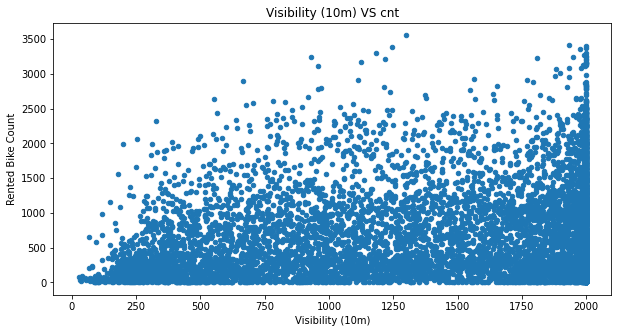

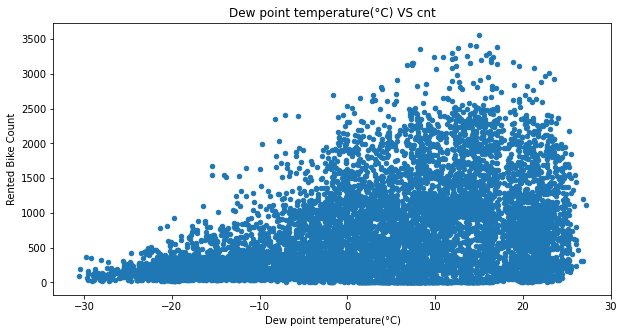

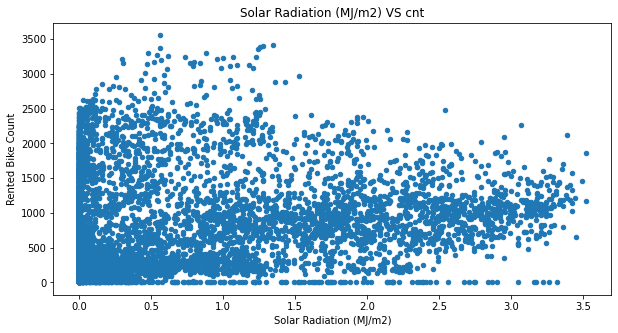

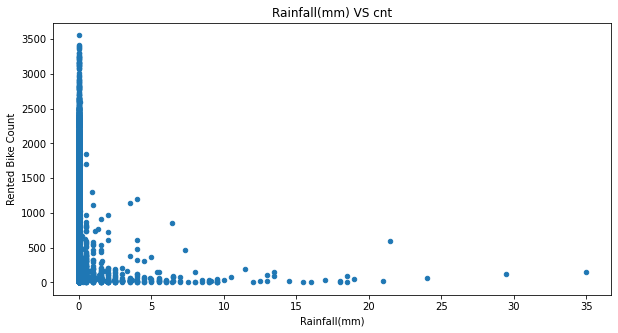

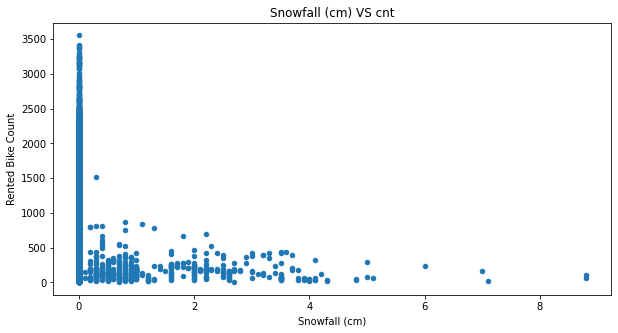

In [106]:
ContinuousCols=['Temperature(°C)','Humidity(%)','Wind speed (m/s)','Visibility (10m)','Dew point temperature(°C)',
               'Solar Radiation (MJ/m2)','Rainfall(mm)','Snowfall (cm)']

# Plotting scatter chart for each predictor vs the target variable
for predictor in ContinuousCols:
    df_train.plot.scatter(x=predictor, y='Rented Bike Count', figsize=(10,5), title=predictor+" VS "+ 'Rented Bike Count')

In [107]:
# Calculating correlation matrix
ContinuousCols=['Rented Bike Count','Temperature(°C)','Humidity(%)','Wind speed (m/s)','Visibility (10m)','Dew point temperature(°C)',
               'Solar Radiation (MJ/m2)','Rainfall(mm)','Snowfall (cm)']
# Creating the correlation matrix
CorrelationData=df_train[ContinuousCols].corr()
CorrelationData

,Rented Bike Count,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm)
Rented Bike Count,1.000000,0.538558,-0.199780,0.121108,0.199280,0.379788,0.261837,-0.123074,-0.141804
Temperature(°C),0.538558,1.000000,0.159371,-0.036252,0.034794,0.912798,0.353505,0.050282,-0.218405
Humidity(%),-0.199780,0.159371,1.000000,-0.336683,-0.543090,0.536894,-0.461919,0.236397,0.108183
Wind speed (m/s),0.121108,-0.036252,-0.336683,1.000000,0.171507,-0.176486,0.332274,-0.019674,-0.003554
Visibility (10m),0.199280,0.034794,-0.543090,0.171507,1.000000,-0.176630,0.149738,-0.167629,-0.121695
Dew point temperature(°C),0.379788,0.912798,0.536894,-0.176486,-0.176630,1.000000,0.094381,0.125597,-0.150887
Solar Radiation (MJ/m2),0.261837,0.353505,-0.461919,0.332274,0.149738,0.094381,1.000000,-0.074290,-0.072301
Rainfall(mm),-0.123074,0.050282,0.236397,-0.019674,-0.167629,0.125597,-0.074290,1.000000,0.008500
Snowfall (cm),-0.141804,-0.218405,0.108183,-0.003554,-0.121695,-0.150887,-0.072301,0.008500,1.000000


In [108]:
CorrelationData['Rented Bike Count'][abs(CorrelationData['Rented Bike Count']) > 0.5 ]

Rented Bike Count    1.000000
Temperature(°C)      0.538558
Name: Rented Bike Count, dtype: float64

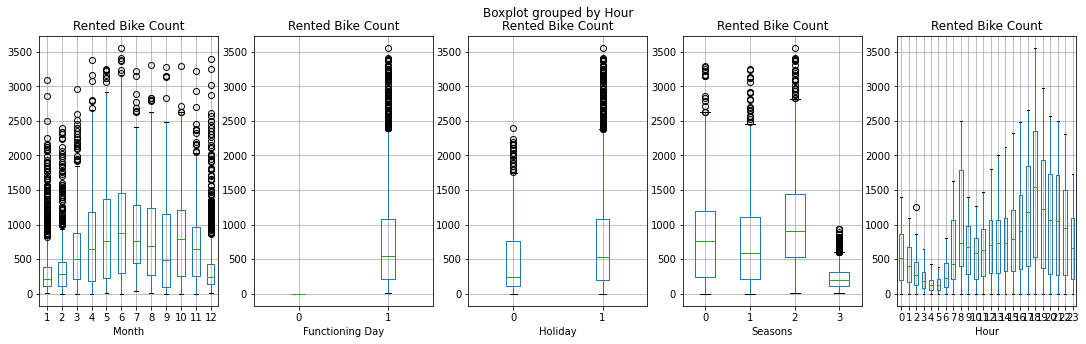

In [109]:
# Box plots for Categorical Target Variable "Rented Bike Count" and continuous predictors
CategoricalColsList=['Month','Functioning Day','Holiday','Seasons','Hour']

import matplotlib.pyplot as plt
fig, PlotCanvas=plt.subplots(nrows=1, ncols=len(CategoricalColsList), figsize=(18,5))

# Creating box plots for each continuous predictor against the Target Variable "Rented Bike Count"
for PredictorCol , i in zip(CategoricalColsList, range(len(CategoricalColsList))):
    df_train.boxplot(column='Rented Bike Count', by=PredictorCol, figsize=(5,5), vert=True, ax=PlotCanvas[i])

In [110]:
# Defining a function to find the statistical relationship with all the categorical variables
def FunctionAnova(inpData, TargetVariable, CategoricalPredictorList):
    from scipy.stats import f_oneway

    # Creating an empty list of final selected predictors
    SelectedPredictors=[]
    
    print('##### ANOVA Results ##### \n')
    for predictor in CategoricalPredictorList:
        CategoryGroupLists=inpData.groupby(predictor)[TargetVariable].apply(list)
        AnovaResults = f_oneway(*CategoryGroupLists)
        
        # If the ANOVA P-Value is <0.05, that means we reject H0
        if (AnovaResults[1] < 0.05):
            print(predictor, 'is correlated with', TargetVariable, '| P-Value:', AnovaResults[1])
            SelectedPredictors.append(predictor)
        else:
            print(predictor, 'is NOT correlated with', TargetVariable, '| P-Value:', AnovaResults[1])
    
    return(SelectedPredictors)

In [111]:
# Calling the function to check which categorical variables are correlated with target
CategoricalPredictorList=['Month','Functioning Day','Holiday','Seasons','Hour']
FunctionAnova(inpData=df_train, 
              TargetVariable='Rented Bike Count', 
              CategoricalPredictorList=CategoricalPredictorList)

##### ANOVA Results ##### 

Month is correlated with Rented Bike Count | P-Value: 4.396690060136829e-186
Functioning Day is correlated with Rented Bike Count | P-Value: 6.732210575545294e-83
Holiday is correlated with Rented Bike Count | P-Value: 1.2156443235104595e-11
Seasons is correlated with Rented Bike Count | P-Value: 0.0
Hour is correlated with Rented Bike Count | P-Value: 0.0


['Month', 'Functioning Day', 'Holiday', 'Seasons', 'Hour']

In [112]:
finalFeature = ['Month','Functioning Day','Holiday','Seasons','Hour','Temperature(°C)']

In [113]:
df_finalFeature=df_train[finalFeature]
df_finalFeature.head()

,Month,Functioning Day,Holiday,Seasons,Hour,Temperature(°C)
0,1,1,1,3,0,-5.2
1,1,1,1,3,1,-5.5
2,1,1,1,3,2,-6.0
3,1,1,1,3,3,-6.2
4,1,1,1,3,4,-6.0


In [114]:
df_finalFeature['Rented Bike Count']=df_train['Rented Bike Count']

In [115]:
TargetVariable='Rented Bike Count'
Predictors=['Month','Functioning Day','Holiday','Seasons','Hour','Temperature(°C)']

In [116]:
X=df_finalFeature[Predictors].values
y=df_finalFeature[TargetVariable].values

# Split the data into training and testing set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=3)

In [117]:
# Linear regression
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model1=model.fit(X_train,y_train)
prediction=model1.predict(X_test)

from sklearn import metrics
print('R2 Value:',metrics.r2_score(y_train, model1.predict(X_train)))

R2 Value: 0.4861358335717667


In [118]:
# Decision Trees
from sklearn.tree import DecisionTreeRegressor
model = DecisionTreeRegressor(max_depth=8,criterion='mse')

model2=model.fit(X_train,y_train)
prediction=model2.predict(X_test)

from sklearn import metrics

print('R2 Value:',metrics.r2_score(y_train, model2.predict(X_train)))

R2 Value: 0.7301667377332672


In [119]:
# Random Forest (Bagging of multiple Decision Trees)
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor(max_depth=10, n_estimators=100,criterion='mse')

model3=model.fit(X_train,y_train)
prediction=model3.predict(X_test)

from sklearn import metrics
# Measuring Goodness of fit
print('R2 Value:',metrics.r2_score(y_train, model3.predict(X_train)))

R2 Value: 0.8229959329027564


In [120]:
# K-Nearest Neighbor(KNN)
from sklearn.neighbors import KNeighborsRegressor
model = KNeighborsRegressor(n_neighbors=2)

model4=model.fit(X_train,y_train)
prediction=model4.predict(X_test)

from sklearn import metrics
# Measuring Goodness of fit 
print('R2 Value:',metrics.r2_score(y_train, model4.predict(X_train)))

R2 Value: 0.8861328486348903


In [121]:
# Xtreme Gradient Boosting (XGBoost)
from xgboost import XGBRegressor
model=XGBRegressor(max_depth=10, 
                      learning_rate=0.1, 
                      n_estimators=100, 
                      objective='reg:linear', 
                      booster='gbtree')

# Creating the model on Training Data
model5=model.fit(X_train,y_train)
prediction=model5.predict(X_test)

from sklearn import metrics
# Measuring Goodness of fit
print('R2 Value:',metrics.r2_score(y_train, model5.predict(X_train)))

[17:01:29] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
R2 Value: 0.9579227899743317


In [122]:
#I am choosing XGBOOST as the final model since it is producing the best accuracy on this data.